In [1]:
import pandas as pd
from pandas import pivot_table
from collections import Counter, defaultdict

In [2]:
df = pd.read_csv('df.csv', sep=';', index_col = 0)
df.head()

,Регион,region_code,Численность населения,Число вузов,Численность студентов,Принято,Выпущено,Приведенный контингент студентов,IT студентов,Доля ИТ студентов,Выпуск ИТ студентов,Всего вакансий,IT Вакансий,IT Зарплата,Выпускников на вакансию
0,Белгородская область,RU-BEL,1541259,11,46181,12049,9821,26683,9102,0.34,3350,6262,498,68846,5.73
1,Брянская область,RU-BRY,1182682,10,22876,5661,5177,12378,4995,0.40,2089,3810,286,63276,6.30
2,Владимирская область,RU-VLA,1342099,9,25377,6999,5878,66087,22932,0.35,2039,7621,525,50748,2.88
3,Москва,RU-MOW,12655050,150,722489,219839,165177,513533,157918,0.31,50794,170374,35780,128412,0.42
4,Ивановская область,RU-IVA,987032,11,24274,6214,4838,16202,7526,0.46,2247,4883,341,71298,5.59


Влияние зарплаты на трудоустройство выпускников

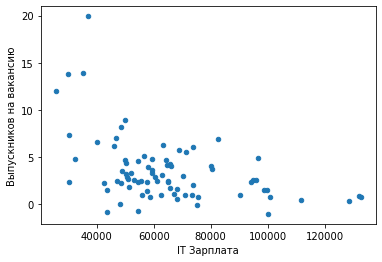

In [3]:
df.plot(x='IT Зарплата', y='Выпускников на вакансию', kind='scatter')

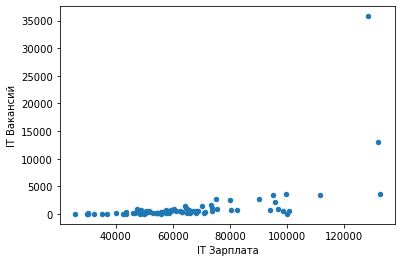

In [4]:
df.plot(x='IT Зарплата', y='IT Вакансий', kind='scatter')

Соотношение студентов, выпускников и текущих вакансий на примере Москвы

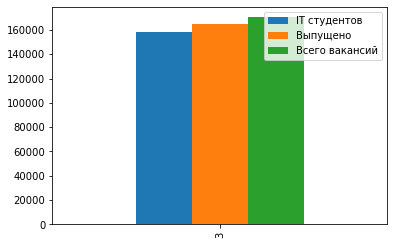

In [5]:
df[df.Регион=="Москва"].plot(y=['IT студентов', 'Выпущено', 'Всего вакансий'], kind='bar')

Соотношение студентов, выпускников и текущих IT вакансий на примере Москвы

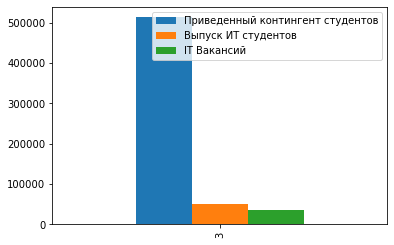

In [6]:
df[df.Регион=="Москва"].plot(y=['Приведенный контингент студентов', 'Выпуск ИТ студентов', 'IT Вакансий'], kind='bar')

Наиболее часто встречающиеся зарплаты

In [7]:
df['IT Зарплата'].value_counts(bins = 10)

(47131.0, 57812.0]      22
(57812.0, 68493.0]      20
(68493.0, 79174.0]       9
(89855.0, 100536.0]      8
(36450.0, 47131.0]       7
(25662.189, 36450.0]     6
(121898.0, 132579.0]     3
(79174.0, 89855.0]       3
(111217.0, 121898.0]     1
(100536.0, 111217.0]     1
Name: IT Зарплата, dtype: int64

Топ 10 регионов по количеству студентов IT специальностей

In [8]:
df[['Регион', 'IT студентов', 'IT Вакансий', 'IT Зарплата']].sort_values(by=['IT студентов'], ascending=False)[0:10]

,Регион,IT студентов,IT Вакансий,IT Зарплата
3,Москва,157918,35780,128412
18,Санкт-Петербург,91116,12971,132098
35,Республика Татарстан,36855,3336,94990
47,Ростовская область,34319,2517,80028
55,Свердловская область,28458,3524,99716
36,Самарская область,24952,2226,95865
64,Новосибирская область,24274,3638,132579
2,Владимирская область,22932,525,50748
32,Республика Башкортостан,22109,1412,64233
63,Красноярский край,20696,1095,64552


Топ 10 регионов по количеству IT вакансий

In [9]:
df[['Регион', 'IT студентов', 'IT Вакансий', 'IT Зарплата']].sort_values(by=['IT Вакансий'], ascending=False)[0:10]

,Регион,IT студентов,IT Вакансий,IT Зарплата
3,Москва,157918,35780,128412
18,Санкт-Петербург,91116,12971,132098
64,Новосибирская область,24274,3638,132579
55,Свердловская область,28458,3524,99716
43,Краснодарский край,12545,3404,111653
35,Республика Татарстан,36855,3336,94990
9,Московская область,7201,2759,75230
28,Нижегородская область,15899,2723,90362
47,Ростовская область,34319,2517,80028
36,Самарская область,24952,2226,95865


Топ 10 регионов по средней зарплате в IT сфере

In [10]:
df[['Регион', 'IT студентов', 'IT Вакансий', 'IT Зарплата']].sort_values(by=['IT Зарплата'], ascending=False)[0:10]

,Регион,IT студентов,IT Вакансий,IT Зарплата
64,Новосибирская область,24274,3638,132579
18,Санкт-Петербург,91116,12971,132098
3,Москва,157918,35780,128412
43,Краснодарский край,12545,3404,111653
19,Калининградская область,3763,565,100802
22,Ненецкий АО,0,1,100000
55,Свердловская область,28458,3524,99716
46,Республика Крым,4004,574,98529
69,Томская область,18096,808,96742
36,Самарская область,24952,2226,95865


In [11]:
vacancies = pd.read_csv('vacancies_data.csv', sep='|',index_col =0)
vacancies.head()

,Специальность,area_id,creation_month,key_skills
0,Системный администратор,1002,2019-04,['']
1,Телемаркетолог,71,2019-08,['']
2,Специалист по информационной безопасности,2062,2019-07,['']
3,SEO-специалист,92,2019-05,['']
4,Инженер-программист,63,2019-10,"['C++', ' MATLAB', ' MS Visual Studio', ' MS V..."


In [12]:
dinamika = pivot_table(vacancies[['Специальность', 'area_id', 'creation_month', 'key_skills']], values='area_id', index=['Специальность'], \
                      columns=['creation_month'], aggfunc='count').fillna(0)
dinamika.columns = ['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', 
                    '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'] 
dinamika = dinamika.astype(int)
dinamika.sort_values(by=['2019-12-01'], ascending=False)

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
Специальность,,,,,,,,,,,,
Системный администратор,1223,1167,1132,1150,985,1069,1195,1167,1193,1343,1261,986
Web-программист,908,840,840,894,763,759,830,852,890,920,766,531
SMM-менеджер,721,597,607,621,546,508,580,595,612,664,595,436
Интернет-маркетолог,626,571,600,523,492,491,545,525,531,671,541,375
Разработчик 1С,493,478,486,470,415,395,448,422,465,475,441,308
...,...,...,...,...,...,...,...,...,...,...,...,...
Scrum Master,4,8,4,6,5,6,9,2,11,6,9,2
Моушн-дизайнер,4,4,14,6,6,5,6,2,8,8,4,2
Специалист по сопровождению ПО,2,7,4,12,6,5,5,2,7,8,6,1


In [13]:
vacancies['key_skills'] = vacancies['key_skills'].str.replace('[', '').str.replace(']', '').str.replace("'", '').str.split(',')
vacancies_dict = vacancies[['Специальность', 'key_skills']].groupby(by=["Специальность"]).sum()
vacancies_dict['skills'] = vacancies_dict['key_skills'].apply(lambda mylist: list([x for x in mylist if x]))
vacancies_dict['key_skills'] = vacancies_dict['skills'].apply(lambda x: [elem[0] for elem in Counter(x).most_common(5)])
vacancies_dict.head()

,key_skills,skills
Специальность,,
.NET Developer,"[ C#, ASP.NET, .NET Framework, C#, Java...","[Trade Marketing, BTL, Продвижение бренда,..."
2D-художник,"[Adobe Photoshop, Рисунок, Графический диз...","[Adobe Photoshop, 3D Max, Autodesk Maya, ..."
3D-дизайнер,"[ 3D Моделирование, Adobe Photoshop, 3ds ...","[Adobe Photoshop, Визуализация, AutoCAD, ..."
Android разработчик,"[ Java, Android SDK, Android, Android, ...","[Android, Java, ООП, Java, JavaScript, ..."
Backend-разработчик,"[ Git, MySQL, PHP, PostgreSQL, SQL]","[Python, PostgreSQL, Разработка ПО, Git,..."


Ключевые навыки для некоторых вакансий

In [14]:
print('Системный администратор')
print(vacancies_dict.key_skills.loc['Системный администратор'])
print()
print('Web-программист')
print(vacancies_dict.key_skills.loc['Web-программист'])
print()
print('SMM-менеджер')
print(vacancies_dict.key_skills.loc['SMM-менеджер'])
print()
print('Интернет-маркетолог')
print(vacancies_dict.key_skills.loc['Интернет-маркетолог'])
print()
print('Разработчик 1С')
print(vacancies_dict.key_skills.loc['Разработчик 1С'])

Системный администратор
['  Администрирование сетевого оборудования', '  Администрирование серверов Windows', '  Настройка сетевых подключений', '  Настройка ПК', '  Настройка ПО']

Web-программист
['  Adobe Photoshop', '  Adobe Illustrator', '  Графический дизайн', '  HTML', '  CSS']

SMM-менеджер
['  Ведение групп в социальных сетях', 'SMM', '  Продвижение в социальных группах', '  Копирайтинг', '  SMM']

Интернет-маркетолог
['  Интернет-реклама', '  Контекстная реклама', '  Google Analytics', '  Яндекс.Метрика', '  Google AdWords']

Разработчик 1С
['1С программирование', '  1С: Предприятие 8', '  1С: Бухгалтерия', '  1С: Зарплата и управление персоналом', '  1С программирование']
